In [1]:
# Statistical Methods in Artificial Intelligence
# Problem Set 12
# Solution to Problem Number 3
# Author: Sayar Ghosh Roy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data_matrix = np.genfromtxt('wine.csv', delimiter=",")

train_data = data_matrix[1:1001,0:11]
train_means = np.mean(train_data, axis = 0)
train_var = np.var(train_data, axis = 0)
train_data = (train_data - train_means) / np.sqrt(train_var)

test_data = data_matrix[1001:, 0:11]

train_labels = data_matrix[1:1001, 11]
test_labels = data_matrix[1001:, 11]

OSError: wine.csv not found.

In [3]:
Hessian = np.zeros((train_data.shape[1], train_data.shape[1]))
for i in range(train_data.shape[1]):
    for j in range(train_data.shape[1]):
        res = 0
        for k in range(train_data.shape[0]):
            res = res + (train_data[k][i] * train_data[k][j])
            Hessian[i][j] = res / train_data.shape[0]

Hessian = Hessian * 2
            
H_inv = np.linalg.inv(Hessian)

In [4]:
#print(train_labels)
#print(np.shape(train_labels))

In [5]:
#print(train_data)
#print(np.shape(train_data))

#print(np.mean(train_data, axis = 0))

In [6]:
iter_counts = []

In [7]:
# Using Normal Gradient Descent
print("Using Normal Gradient Descent:")
w_old = np.zeros(11)
w = np.ones(11)
learn_rate = 0.25

count = 0
while (np.linalg.norm(w - w_old) > 0.00001):
    sum_mat = np.zeros(11)
    for i in range(len(train_labels)):
        store = train_labels[i] - np.dot(w, train_data[i])
        store = (-1) * store * train_data[i]
        sum_mat = sum_mat + store
    
    del_J = (2 / len(train_data)) * sum_mat
    w_old = w
    w = w - learn_rate * del_J
    count += 1
    if(count > 1000):
        break
        
print("Final Weights :", w)
print("Required Number of Iterations :", count)
iter_counts.append(count)

Using Normal Gradient Descent:
Final Weights : [ 0.06631995 -0.17763792 -0.04048215  0.03725833 -0.07147423  0.03187237
 -0.14079713 -0.05304304 -0.02811342  0.13062319  0.28926005]
Required Number of Iterations : 237


In [8]:
res = 0
for i in range(len(train_labels)):
    res = res + np.power((train_labels[i] - np.dot(w, train_data[i])), 2)
res = res / len(train_labels)
print("Loss :", res)

Loss : 31.704978380504297


In [9]:
# Using Gradient Descent with optimal learning rate
print("Using Gradient Descent with optimal learning rate:")
w_old = np.zeros(11)
w = np.ones(11)
learn_rate = 0.25

count = 0
while (np.linalg.norm(w - w_old) > 0.01):
    sum_mat = np.zeros(11)
    for i in range(len(train_labels)):
        store = train_labels[i] - np.dot(w, train_data[i])
        store = (-1) * store * train_data[i]
        sum_mat = sum_mat + store
    del_J = (2 / len(train_data)) * sum_mat
    w_old = w
    learn_rate = np.power(np.linalg.norm(del_J), 2) / (np.dot(del_J, np.dot(Hessian, del_J)))
    w = w - learn_rate * del_J
    count += 1
    if(count > 1000):
        break
        
print("Final Weights :", w)
print("Number of iterations :", count)
iter_counts.append(count)

res = 0
for i in range(len(train_labels)):
    res = res + np.power((train_labels[i] - np.dot(w, train_data[i])), 2)
res = res / len(train_labels)
print("Loss :", res)

Using Gradient Descent with optimal learning rate:
Final Weights : [ 0.18491389 -0.17450241 -0.05042812  0.06734542 -0.05757667  0.02154474
 -0.1265946  -0.14186091  0.03102176  0.14174994  0.24007141]
Number of iterations : 30
Loss : 31.706849496731717


In [10]:
# Using Gradient Descent with Newton's Method
print("Using Gradient Descent with Newton's Method:")
w_old = np.zeros(11)
w = np.ones(11)
learn_rate = 0.25

count = 0
while (np.linalg.norm(w - w_old) > 0.01):
    sum_mat = np.zeros(11)
    for i in range(len(train_labels)):
        store = train_labels[i] - np.dot(w, train_data[i])
        store = (-1) * store * train_data[i]
        sum_mat = sum_mat + store
    del_J = (2 / len(train_data)) * sum_mat
    w_old = w
    w = w - np.matmul(H_inv, del_J)
    count += 1
    if(count > 1000):
        break
        
print("Final Weights :", w)
print("Number of iterations :", count)
iter_counts.append(count)

res = 0
for i in range(len(train_labels)):
    res = res + np.power((train_labels[i] - np.dot(w, train_data[i])), 2)
res = res / len(train_labels)
print("Loss :", res)

Using Gradient Descent with Newton's Method:
Final Weights : [ 0.06610812 -0.17764004 -0.04045245  0.03720737 -0.07150087  0.03189306
 -0.14082744 -0.05288596 -0.02822018  0.13060648  0.28934333]
Number of iterations : 2
Loss : 31.704978374704403


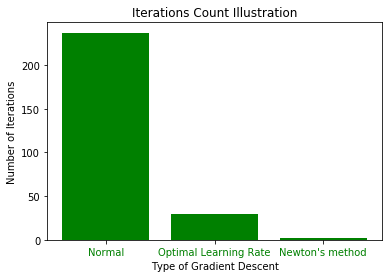

In [11]:
x_keys = ['Normal', 'Optimal Learning Rate', 'Newton\'s method']
x =  [i for i, _ in enumerate(x_keys)]
y = [ i for i in iter_counts]
plt.figure()
plt.title("Iterations Count Illustration")
plt.xlabel("Type of Gradient Descent")
plt.ylabel('Number of Iterations')
plt.bar(x, y, color='green')
plt.xticks(x, x_keys, color = 'green')
plt.show()

In [12]:
# ^_^ Thank You